# Load data into Spark DataFrame

In [1]:
# import findspark
# findspark.init()
import pyspark
import random
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000000
def inside(p):     
  x, y = random.random(), random.random()
  return x*x + y*y < 1
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()


3.14147264


In [2]:
from pyspark import SparkContext

In [3]:
import pyspark.sql.functions as F

In [4]:
from pyspark.sql.session import SparkSession
from pyspark import SparkContext
sc2 = SparkContext('local')
spark = SparkSession(sc2)

In [5]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [6]:
df = spark.read.csv('data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [7]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168539760|    P| 4732048|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168547857|    P| 4356304|2017-03-30|
|168551487|    P|  811133|2017-03-30|
|168519439|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168551579|    P| 8762277|2017-03-30|
|168551008|    P|   58391|2017-03-30|
|168550564|    P|  708741|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548239|    P| 6673573|2017-03-30|
|168551182|    P|23491653|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168548945|    P|20429929|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548840|    P|20066194|2017-03-30|
|168550571|    P|       0|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [9]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [10]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168539760|    P| 4732048|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168547857|    P| 4356304|2017-03-30|
|168551487|    P|  811133|2017-03-30|
|168519439|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168551579|    P| 8762277|2017-03-30|
|168551008|    P|   58391|2017-03-30|
|168550564|    P|  708741|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548239|    P| 6673573|2017-03-30|
|168551182|    P|23491653|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168548945|    P|20429929|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548840|    P|20066194|2017-03-30|
|168550571|    P|       0|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Data Exploration

In [11]:
# count rows
df.count()

8186809

In [12]:
# select operation, count distinct rows
df.select('uid').distinct().count()

57079

In [13]:
# group by aggregation 'event' 
df.groupBy('event').count().show()

+-----+-------+
|event|  count|
+-----+-------+
|    D| 622041|
|    S| 765144|
|    P|6799624|
+-----+-------+



In [14]:
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+-------+--------+
|event|  count| max_uid|
+-----+-------+--------+
|    D| 622041|99725077|
|    S| 765144|99725077|
|    P|6799624|99996283|
+-----+-------+--------+



In [16]:
# filter operation
# group by aggregation
# order by operation
# select date between 2017-04-1 and 2017-04-05
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 29619|
|2017-04-01|    P|489289|
|2017-04-01|    S| 32633|
|2017-04-02|    D| 25892|
|2017-04-02|    P|439881|
|2017-04-02|    S| 29565|
|2017-04-03|    D| 19212|
|2017-04-03|    P|249879|
|2017-04-03|    S| 26689|
|2017-04-04|    D| 21599|
|2017-04-04|    P|379189|
|2017-04-04|    S| 24777|
|2017-04-05|    D| 17147|
|2017-04-05|    P|307058|
|2017-04-05|    S| 19307|
+----------+-----+------+



In [17]:
date_count = df.groupBy('date').count().toPandas()

(array([ 736419.,  736426.,  736433.,  736440.,  736447.,  736454.,  736461.]),
 <a list of 7 Text xticklabel objects>)

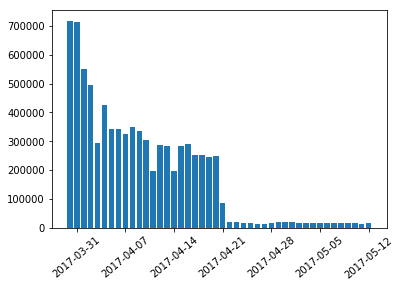

In [18]:
plt.bar(date_count['date'],date_count['count'])
# plt.xticks(rotation='vertical')
plt.xticks(rotation='40')

# Label Definition

In [19]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [20]:
# all the uid I will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [21]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [22]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|43325|
|    0|13754|
+-----+-----+



# Feature generation

In [23]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [24]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [25]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date

df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [26]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167862193|           48|
|167587246|            7|
|167879979|            6|
|168403282|            1|
|168345548|            1|
+---------+-------------+
only showing top 5 rows



In [27]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [28]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]


##### Medthod 2:  Another way instead of joining to much dfs

In [29]:
# Define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
     
               for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [69]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167587246|            6|            7|           21|            37|            75|
|167753093|            0|            0|            6|             7|            27|
|167894185|            0|            0|            4|             4|             5|
|167810312|            0|            0|            6|             9|            19|
|168047309|            0|            0|            5|            50|            62|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [72]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list2 = []
for event in event_list:
    df_feature_list2.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [73]:
df_feature_list2

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [33]:
# defined as days from last event 
# can generate one feature for each type of event

def feature_generation_time_windows_foreachtype ( df,event,time_window_list,snapshot_date):
    """
    generate frequency features for each event type and a list of time windows
    """
    df_feature = df \
          .groupBy('uid') \
          .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1))&(F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
     
                 for time_window in time_window_list]
            )
        # *[] opens list and make them comma separated
    return df_feature

    event_list = ['P','D','S']
    time_window_list = [1,3,7,14,30]
    df_feature_list = []
    for event in event_list:
        df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [34]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Profile features

In [35]:
df_play = spark.read.csv('data/play_ds.csv',header=True)

In [36]:
df_play.show(30)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168539760|    ar| 4732048|2017-03-30|      197|        198|
|168543026|    ar| 6623026|2017-03-30|        0|          0|
|168550571|    ar|       0|2017-03-30|       24|        251|
|168547857|    ar| 4356304|2017-03-30|        3|          0|
|168551487|    ar|  811133|2017-03-30|      200|        200|
|168519439|    ar|       0|2017-03-30|      227|        228|
|168550571|    ar|       0|2017-03-30|        4|        287|
|168551579|    ar| 8762277|2017-03-30|      213|        232|
|168551008|    ar|   58391|2017-03-30|       89|        273|
|168550564|    ar|  708741|2017-03-30|      258|        320|
|168550571|    ar|       0|2017-03-30|       55|        287|
|168548239|    ar| 6673573|2017-03-30|      205|        205|
|168551182|    ar|23491653|2017-03-30|      311|        312|
|168550571|    ar|      

In [37]:
df_play.count()

6799624

In [38]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [39]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    mc|    1|
|    ar|49757|
|    wp|    1|
|    ip| 7325|
+------+-----+



In [49]:
# check if one user has two devices
# show the 'uid' of these users
multidevices_uid1 = df_profile_tmp.groupBy('uid').count() 

In [52]:
multidevices_uid2 = multidevices_uid1.filter(F.col('count') > 1)

##### These users use two devices

In [53]:
multidevices_uid2.show()

+---------+-----+
|      uid|count|
+---------+-----+
|168293116|    2|
|168652700|    2|
|168134398|    2|
|168577159|    2|
|168651980|    2|
|168577091|    2|
|168577045|    2|
|168652635|    2|
|168652350|    2|
+---------+-----+



In [54]:
df_profile_tmp.distinct().count()

57084

In [55]:
# reanme lable, ip for 1, other for 2 
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7325|
|          2|49759|
+-----------+-----+



In [56]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|    4|
|          1| 7325|
|          2|49759|
+-----------+-----+



### Total play time features

In [134]:
# Clean play time first
df_play_clean_playtime = df_play.filter((F.col('play_time')>=0))
print ('cleaned data =',df_play.count() - df_play_clean_playtime.count() , 'rows')

cleaned data = 40944 rows


In [75]:
# Generate total song play time features for different time window
time_window_list

[1, 3, 7, 14, 30]

In [71]:
df_play_clean_playtime.show()

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168539760|    ar| 4732048|2017-03-30|      197|        198|
|168543026|    ar| 6623026|2017-03-30|        0|          0|
|168550571|    ar|       0|2017-03-30|       24|        251|
|168547857|    ar| 4356304|2017-03-30|        3|          0|
|168551487|    ar|  811133|2017-03-30|      200|        200|
|168519439|    ar|       0|2017-03-30|      227|        228|
|168550571|    ar|       0|2017-03-30|        4|        287|
|168551579|    ar| 8762277|2017-03-30|      213|        232|
|168551008|    ar|   58391|2017-03-30|       89|        273|
|168550564|    ar|  708741|2017-03-30|      258|        320|
|168550571|    ar|       0|2017-03-30|       55|        287|
|168548239|    ar| 6673573|2017-03-30|      205|        205|
|168551182|    ar|23491653|2017-03-30|      311|        312|
|168550571|    ar|      

In [135]:
df_play_clean_playtime['play_time'].cast('float').alias('playtime')


# df = rawdata.select(col('house name'),
#                     rawdata.price.cast('float').alias('price'))

Column<b'CAST(play_time AS FLOAT) AS `playtime`'>

In [136]:
df_play_clean_playtime['play_time']

Column<b'play_time'>

In [137]:
def playtime_time_windows(df,time_window,snapshot_date):
    """
    
    """
    df_ttime_feature = df \
        .groupBy('uid') \
        .sum('play_time')\
        
          
    return df_ttime_feature

In [1]:
time_window_list = [1, 3, 7, 14, 30]
snapshot_date = feature_window_end_date
for time_window in time_window_list:
    df_ttime_feature =playtime_time_windows(df_play_clean_playtime ,time_window,snapshot_date)  

In [115]:
df_ttime_feature.show()

+---------+------------------------+
|      uid|totaltimeplayed__last_30|
+---------+------------------------+
|168554589|                      78|
|168568575|                       6|
|168575099|                      15|
|168575286|                       8|
|168576233|                     113|
|168577238|                      12|
|168579046|                     225|
|168610547|                       5|
|168582135|                     225|
|168602946|                      11|
|168613666|                       4|
|168613800|                      68|
|168617129|                       1|
|168622990|                      40|
|  4987532|                     264|
|168626289|                      18|
|168669745|                      12|
|168662049|                     387|
|168660476|                     641|
|168681482|                      74|
+---------+------------------------+
only showing top 20 rows



# Form training data

In [60]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [61]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [62]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [139]:
df_model_final.fillna(0).toPandas().to_csv('data/df_model_final.csv',index=False)